In [1]:
import os
print(os.listdir("/Users/zijunning/Documents/EECS_351"))

['.DS_Store', 'data_32', 'data_256', 'README.md', '.gitignore', '351.ipynb', '.ipynb_checkpoints', '.git']


In [2]:
# check if files can be opened
from os import walk
for (dirpath, dirnames, filenames) in walk("/Users/zijunning/Documents/EECS_351/data_256"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)

Directory path:  /Users/zijunning/Documents/EECS_351/data_256
Folder name:  ['art_pictures', '.ipynb_checkpoints']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures
Folder name:  ['test', 'train']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test
Folder name:  ['expressionism', 'art_nouveau', 'renaissance', 'ukiyo_e', 'realism', 'romanticism', 'surrealism', 'impressionism', 'baroque', 'post_impressionism']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/expressionism
Folder name:  []
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/art_nouveau
Folder name:  ['.ipynb_checkpoints']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/art_nouveau/.ipynb_checkpoints
Folder name:  []
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/renaissance
Folder name:  []
Directory path:  /Users/zijunning/Documents/EECS_351/data_

In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.ImageFolder("/Users/zijunning/Documents/EECS_351/data_256/art_pictures/train",
                               transform=transform)

In [38]:
dataset[49999]

(tensor([[[0.8431, 0.6863, 0.6588,  ..., 0.8902, 0.8902, 0.9059],
          [0.8941, 0.8941, 0.8941,  ..., 0.8902, 0.8824, 0.8784],
          [0.8941, 0.8863, 0.7373,  ..., 0.8784, 0.8784, 0.8784],
          ...,
          [0.8980, 0.9020, 0.8902,  ..., 0.9059, 0.9255, 0.8314],
          [0.8863, 0.8902, 0.8784,  ..., 0.9020, 0.7765, 0.6118],
          [0.8706, 0.8745, 0.8667,  ..., 0.7059, 0.6235, 0.6000]],
 
         [[0.8235, 0.6667, 0.6510,  ..., 0.8627, 0.8627, 0.8784],
          [0.8745, 0.8745, 0.8863,  ..., 0.8627, 0.8549, 0.8510],
          [0.8745, 0.8667, 0.7255,  ..., 0.8510, 0.8510, 0.8510],
          ...,
          [0.8745, 0.8784, 0.8706,  ..., 0.8392, 0.8235, 0.7059],
          [0.8627, 0.8667, 0.8588,  ..., 0.8000, 0.6353, 0.4431],
          [0.8471, 0.8510, 0.8471,  ..., 0.5843, 0.4549, 0.4000]],
 
         [[0.7451, 0.5882, 0.5686,  ..., 0.7529, 0.7529, 0.7686],
          [0.7961, 0.7961, 0.8039,  ..., 0.7529, 0.7451, 0.7412],
          [0.7961, 0.7922, 0.6510,  ...,

In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [6]:
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

In [7]:
labels_map = {
    0: "art_nouveau",
    1: "baroque",
    2: "expressionism",
    3: "impressionism",
    4: "post_impressionism",
    5: "realism",
    6: "renaissance",
    7: "romanticism",
    8: "surrealism",
    9: "ukiyo_e",
}

In [8]:
# Get one batch
images, labels = next(iter(dataloader))

In [9]:
images[1].size()

torch.Size([3, 256, 256])

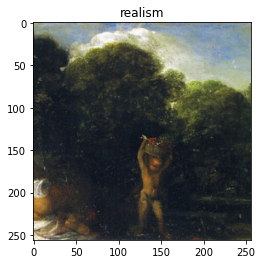

In [15]:
# see some pictures
some_index = 7
plt.title(labels_map[labels[some_index].item()])
plt.imshow(images[some_index].permute(1,2,0))

In [11]:
# from torch.nn import Module
# from torch.nn import Conv2d
# from torch.nn import Linear
# from torch.nn import MaxPool2d
# from torch.nn import ReLU
# from torch.nn import LogSoftmax
# from torch import flatten
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(59536, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [27]:
summary(net, input_size = (32, 3, 256, 256))

/Users/zijunning/opt/anaconda3/lib/python3.9/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/Users/zijunning/opt/anaconda3/lib/python3.9/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [32, 10]                  --
├─Conv2d: 1-1                            [32, 6, 252, 252]         456
├─MaxPool2d: 1-2                         [32, 6, 126, 126]         --
├─Conv2d: 1-3                            [32, 16, 122, 122]        2,416
├─MaxPool2d: 1-4                         [32, 16, 61, 61]          --
├─Linear: 1-5                            [32, 120]                 7,144,440
├─Linear: 1-6                            [32, 84]                  10,164
├─Linear: 1-7                            [32, 10]                  850
Total params: 7,158,326
Trainable params: 7,158,326
Non-trainable params: 0
Total mult-adds (G): 2.31
Input size (MB): 25.17
Forward/backward pass size (MB): 158.56
Params size (MB): 28.63
Estimated Total Size (MB): 212.36

In [17]:
from torchinfo import summary


In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [29]:
PATH = './test_v1.pth'
torch.save(net.state_dict(), PATH)

In [30]:
test_set = datasets.ImageFolder("/Users/zijunning/Documents/EECS_351/data_256/art_pictures/test",
                               transform=transform)
testloader = torch.utils.data.DataLoader(dataset, shuffle=True)

In [32]:
dataiter = iter(testloader)

In [39]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        test_images, test_labels = data
        # calculate outputs by running images through the network
        outputs = net(test_images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %
